## Sentiment Analysis For various Companies using yahoo API

### Import necessary libraries

In [1]:
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import yfinance as yf
import feedparser
import matplotlib.pyplot as plt

### Download NLTK Data

In [3]:
# Download necessary NLTK data (first time only)
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kiman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kiman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Define a List of Companies

In [4]:
companies = [
    {"name": "Blackrock", "ticker": "BLK"},
    {"name": "UPS", "ticker": "UPS"},
    {"name": "Costco", "ticker": "COST"},
    {"name": "JPMorgan", "ticker": "JPM"},
    {"name": "Pepsi", "ticker": "PEP"}
]

### Initialize SentimentIntensityAnalyzer

In [5]:
# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Define Sentiment Analysis Function

In [6]:
# Helper function to perform sentiment analysis
def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return 1 if scores['compound'] > 0 else 0

### Collect and Analyze News for Each Company

In [7]:
# Create dictionaries to store sentiment scores and price changes
sentiment_data = {}
price_change_data = {}

# Collect and analyze news for each company
for company in companies:
    company_name = company["name"]
    ticker_symbol = company["ticker"]
    
    rss_url = f"https://feeds.finance.yahoo.com/rss/2.0/headline?s={ticker_symbol}"
    news_data = feedparser.parse(rss_url)
    
    sentiment_scores = []
    
    for entry in news_data.entries:
        title = entry.title
        summary = entry.summary
        
        # Perform sentiment analysis on title
        title_sentiment = get_sentiment_score(title)
        
        # Perform sentiment analysis on article summary
        summary_sentiment = get_sentiment_score(summary)
        
        # Combine title and summary sentiment scores
        combined_sentiment = max(title_sentiment, summary_sentiment)
        
        sentiment_scores.append(combined_sentiment)
    
    # Calculate and store stock price changes
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(period="1d", interval="1m")
    data["Price Change"] = data["Close"].pct_change()
    
    # Store sentiment scores and price changes in dictionaries
    sentiment_data[company_name] = sentiment_scores
    price_change_data[company_name] = data["Price Change"].fillna(0)  # Fill NaN values with 0

    # Print sentiment scores for the company
    print(f"Company: {company_name} ({ticker_symbol})")
    print("Sentiment Scores:", sentiment_scores)

Company: Blackrock (BLK)
Sentiment Scores: [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
Company: UPS (UPS)
Sentiment Scores: [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
Company: Costco (COST)
Sentiment Scores: [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
Company: JPMorgan (JPM)
Sentiment Scores: [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
Company: Pepsi (PEP)
Sentiment Scores: [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


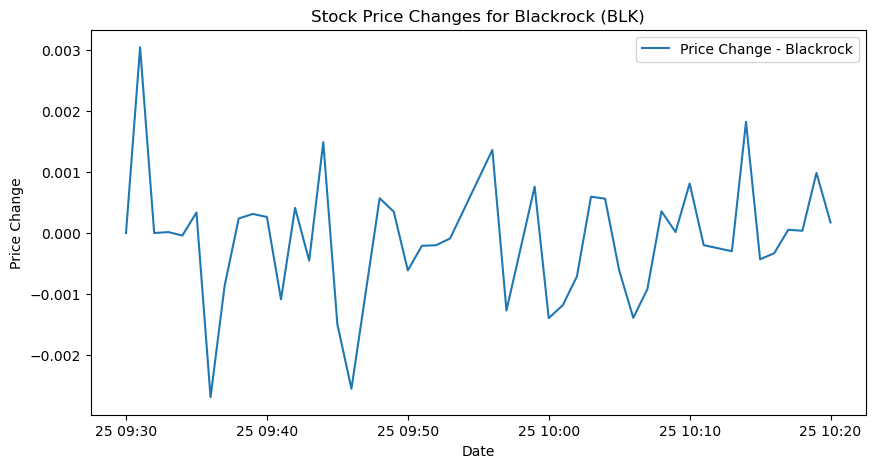

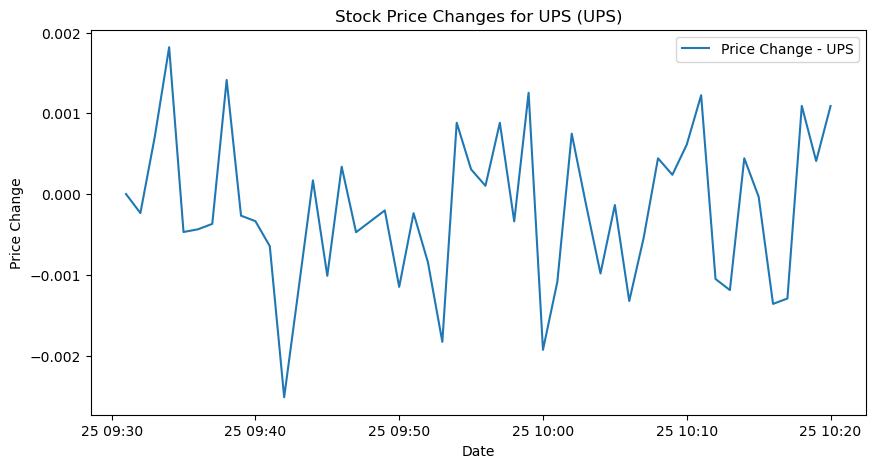

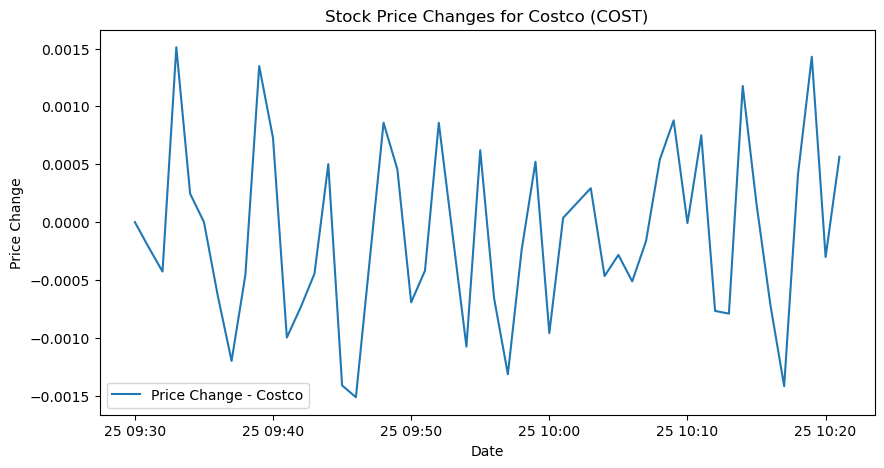

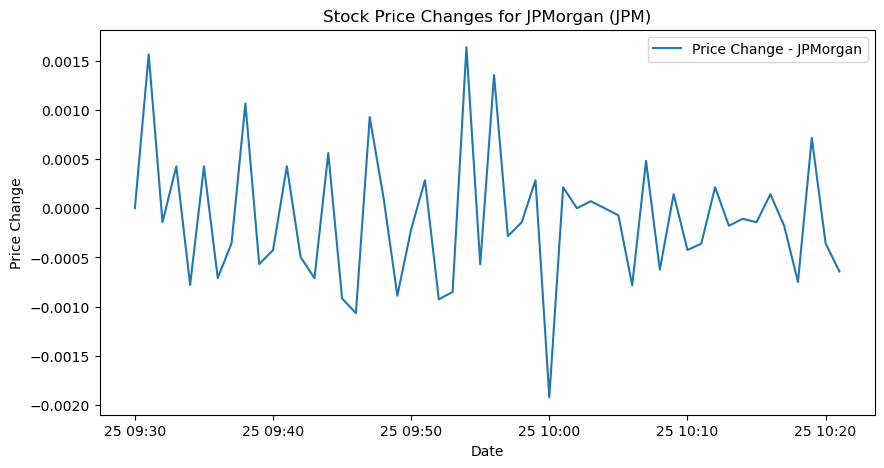

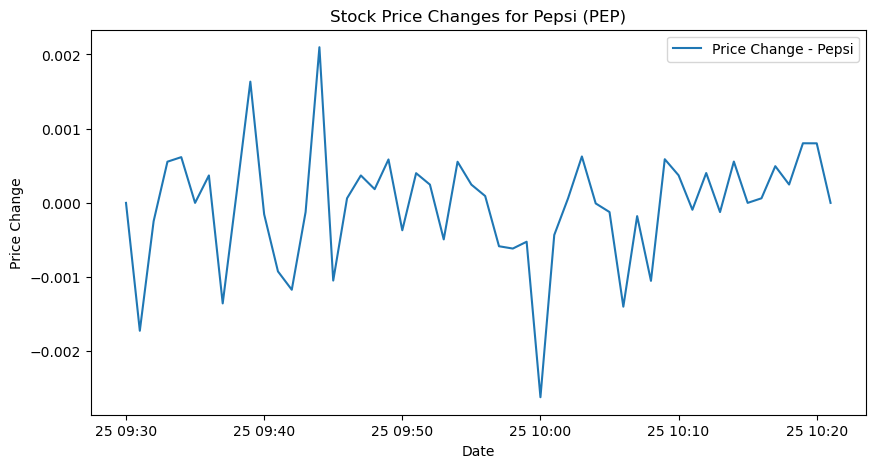

In [8]:
# Plot price change over time for each company
for company in companies:
    company_name = company["name"]
    ticker_symbol = company["ticker"]
    
    price_changes = price_change_data[company_name]
    
    plt.figure(figsize=(10, 5))
    plt.plot(price_changes.index, price_changes, label=f"Price Change - {company_name}")
    plt.title(f"Stock Price Changes for {company_name} ({ticker_symbol})")
    plt.xlabel("Date")
    plt.ylabel("Price Change")
    plt.legend()
    plt.show()

In [9]:
# Import pearsonr explicitly from scipy.stats
from scipy.stats import pearsonr

# Calculate correlation coefficients and print them
for company in companies:
    company_name = company["name"]
    sentiment_scores = sentiment_data[company_name]
    price_changes = price_change_data[company_name]
    
    # Ensure that both lists have the same length
    min_length = min(len(sentiment_scores), len(price_changes))
    sentiment_scores = sentiment_scores[:min_length]
    price_changes = price_changes[:min_length]
    
    # Calculate the Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(sentiment_scores, price_changes)
    
    print(f"Correlation for {company_name}: {correlation_coefficient:.2f}")

Correlation for Blackrock: -0.23
Correlation for UPS: 0.23
Correlation for Costco: -0.24
Correlation for JPMorgan: -0.29
Correlation for Pepsi: 0.46


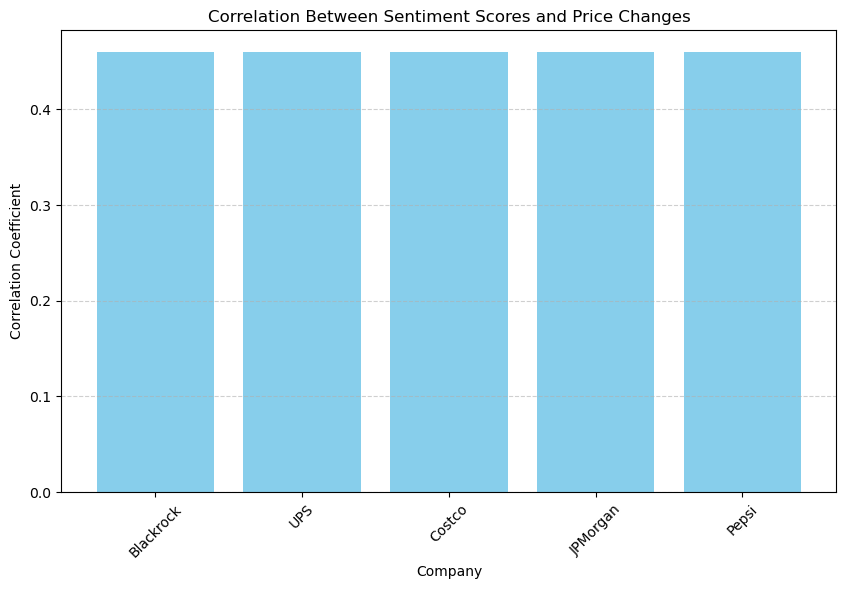

In [10]:
# Plot correlation coefficients
plt.figure(figsize=(10, 6))
plt.bar([company["name"] for company in companies], correlation_coefficient, color='skyblue')
plt.xlabel('Company')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Sentiment Scores and Price Changes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()